# Reading the files

In [5]:
import unicodecsv
import csv


In [6]:
enrollments_filename = 'enrollments.csv'

with open(enrollments_filename, 'rb') as en:
    reader = unicodecsv.DictReader(en)
    enrolls = list(reader)
    print(enrolls[0])

{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}


In [7]:
daily_engagement_filename = 'daily_engagement.csv'

with open(daily_engagement_filename, 'rb') as d:
    reader = unicodecsv.DictReader(d)
    dailies = list(reader)
    print(next(iter(dailies)))

{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}


In [8]:
project_submissions_filename = 'project_submissions.csv'

with open(project_submissions_filename, 'rb') as p:
    reader = unicodecsv.DictReader(p)
    subs=list(reader)
    print(subs[0])

{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


# Fixing the datatypes of the files

In [9]:
from datetime import datetime as dt
def to_int(i):
    if (i==''):
        return None
    else:
        return int(i)
        
def to_float(i):
    if(i==''):
        return None
    else:
        return float(i)
    
def to_date(i):
    if(i==''):
        return None
    else:
        return dt.strptime(i, '%Y-%m-%d')

In [10]:
for enrollment in enrolls:
    enrollment['days_to_cancel'] = to_int(enrollment['days_to_cancel'])
    enrollment['is_udacity'] = enrollment['is_udacity']=='True'
    enrollment['is_canceled'] = enrollment['is_canceled']=='True'
    
    

In [11]:
type(enrolls[0]['cancel_date'])

str

In [12]:
for engagement_record in dailies:
    engagement_record['lessons_completed'] = to_int(to_float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = to_int(to_float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = to_int(to_float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = to_float(engagement_record['total_minutes_visited'])
    
    
dailies[0]

{'acct': '0',
 'utc_date': '2015-01-09',
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [13]:
for submission in subs:
    submission['completion_date'] = to_date(submission['completion_date'])
    submission['creation_date'] = to_date(submission['creation_date'])

subs[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

# Some queries

In [14]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        file = list(reader)
        return file
    
enrolls[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [15]:
count = 0
enrolls_set = set()
for i in enrolls:
    enrolls_set.add(i['account_key'])
    count+=1
    
print(len(enrolls_set))
print(count)

1302
1640


# Fixing some problems in the data

In [16]:
print(dailies[0])
#here the account_key name is different from the other tables ("acct")

{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0}


In [17]:
#fixing this problem

for i in dailies:
    i['account_key'] = i['acct']
    del i['acct']

dailies[0]['account_key']

'0'

In [18]:
dailies[0]

{'utc_date': '2015-01-09',
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0,
 'account_key': '0'}

# Getting the students who enrolled but did not engaged

In [19]:
count = 0
enrolls_set = set()
for i in enrolls:
    enrolls_set.add(i['account_key'])
    count+=1
    
print(len(enrolls_set))
print(count)

1302
1640


In [20]:
count = 0
engagements_set = set()
for i in dailies:
    engagements_set.add(i['account_key'])
    count+=1
    
print(len(engagements_set))
print(count)

1237
136240


In [21]:
print(enrolls_set)

{'838', '1183', '1027', '488', '381', '933', '139', '583', '819', '507', '489', '143', '1108', '595', '557', '707', '995', '890', '550', '152', '1020', '908', '674', '940', '63', '323', '1203', '1270', '327', '258', '1267', '919', '1224', '300', '237', '239', '506', '1066', '881', '1139', '1230', '220', '194', '1175', '671', '887', '1263', '1262', '664', '934', '44', '895', '1272', '145', '949', '384', '344', '1288', '1059', '694', '727', '294', '956', '229', '466', '662', '367', '83', '1176', '954', '818', '319', '1241', '876', '338', '1094', '13', '624', '1053', '475', '635', '42', '1008', '16', '678', '581', '182', '1298', '742', '331', '817', '35', '1202', '823', '492', '490', '1188', '1048', '1018', '931', '669', '231', '1173', '665', '994', '1225', '889', '222', '254', '1', '626', '1278', '1210', '190', '118', '38', '986', '773', '1136', '93', '166', '64', '721', '377', '168', '839', '138', '1006', '325', '746', '351', '747', '659', '500', '898', '233', '910', '0', '230', '809', 

In [22]:
difference = (enrolls_set.difference(engagements_set))
print (difference)

{'1086', '799', '1218', '1191', '728', '968', '1237', '725', '1213', '1063', '664', '902', '717', '1284', '1171', '1155', '1222', '914', '733', '889', '1148', '803', '1238', '711', '1079', '802', '1044', '1304', '737', '1010', '819', '1291', '749', '1190', '871', '1129', '1120', '817', '926', '1241', '870', '878', '996', '1145', '997', '1025', '1186', '1125', '1069', '750', '1273', '654', '766', '981', '841', '727', '739', '964', '1101', '707', '789', '1270', '1219', '884', '875'}


In [23]:
for i in difference:
    for j in enrolls:
        if(type(j['join_date']) == str):
            j['join_date'] = to_date(j['join_date'])
        if(i == j['account_key']) and (j['join_date']!=j['cancel_date']):
            print(j['is_udacity'])
        else:
            continue

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False


# Removing the test accounts from the enrollment table

In [24]:
test_accounts = set()

for i in enrolls:
    if i['is_udacity']:
        test_accounts.add(i['account_key'])
        
len(test_accounts)
            

6

In [25]:
def remove_test_accounts(data):
    non_test_accounts = []
    for i in data:
        if i['account_key'] not in test_accounts:
            non_test_accounts.append(i)
    return non_test_accounts

In [26]:
non_test_enrolls = remove_test_accounts(enrolls)
non_test_engagements = remove_test_accounts(dailies)
non_test_submissions = remove_test_accounts(subs)

print(len(non_test_enrolls))
print(len(non_test_engagements))
print(len(non_test_submissions))

1622
135656
3634


In [ ]:
daily_engagement_full[0]

In [28]:
paid_students = {}

for i in non_test_enrolls:
    if(i['days_to_cancel']==None or i['days_to_cancel']>7):
        account_key = i['account_key']
        
        if(account_key not in paid_students or i['join_date'] > paid_students[account_key]):
            paid_students[account_key] = i['join_date']

In [29]:
print(len(paid_students))

995


In [30]:
print(paid_students)

{'429': datetime.datetime(2015, 3, 10, 0, 0), '60': datetime.datetime(2015, 4, 1, 0, 0), '369': datetime.datetime(2014, 11, 10, 0, 0), '322': datetime.datetime(2015, 3, 10, 0, 0), '336': datetime.datetime(2014, 11, 10, 0, 0), '553': datetime.datetime(2014, 11, 10, 0, 0), '584': datetime.datetime(2015, 3, 10, 0, 0), '458': datetime.datetime(2015, 4, 6, 0, 0), '1058': datetime.datetime(2015, 3, 10, 0, 0), '206': datetime.datetime(2014, 11, 10, 0, 0), '45': datetime.datetime(2015, 3, 10, 0, 0), '315': datetime.datetime(2014, 11, 10, 0, 0), '604': datetime.datetime(2014, 11, 10, 0, 0), '204': datetime.datetime(2014, 11, 10, 0, 0), '408': datetime.datetime(2015, 4, 1, 0, 0), '51': datetime.datetime(2015, 3, 10, 0, 0), '323': datetime.datetime(2014, 11, 10, 0, 0), '568': datetime.datetime(2014, 11, 10, 0, 0), '130': datetime.datetime(2015, 4, 1, 0, 0), '550': datetime.datetime(2015, 5, 28, 0, 0), '44': datetime.datetime(2015, 3, 10, 0, 0), '198': datetime.datetime(2014, 11, 10, 0, 0), '368':

## List from the engagement table including only rows where the students is one of the paid students, and the date is whithin one week of the student's join date

In [92]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0
    
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
    
paid_enrollments = remove_free_trial_cancels(non_test_enrolls)
paid_engagement = remove_free_trial_cancels(non_test_engagements)
paid_submissions = remove_free_trial_cancels(non_test_submissions)
    
print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
        
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
    
len(paid_engagement_in_first_week)

1293
134549
3618


6919

In [93]:
print(paid_engagement_in_first_week[0])

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}


In [94]:
from collections import defaultdict
engagement_by_account = defaultdict(list)
for i in paid_engagement_in_first_week:
    account_key = i['account_key']
    engagement_by_account[account_key].append(i)

## Getting the accounts with total minutes in the first week

In [95]:
total_minutes_by_account={}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [96]:
total_minutes = list(total_minutes_by_account.values())
total = 0
for i in total_minutes:
    total+=i
    
mean = total/len(total_minutes)
print(mean)

306.7083267534284


In [97]:
import numpy as np

minimum = np.min(total_minutes)
maximum = np.max(total_minutes)
std = np.std(total_minutes)
print(minimum)
print(maximum)
print(std)

0.0
3564.7332644989997
412.99693340852957


In [98]:
print(total_minutes_by_account)

{'0': 494.88049616599994, '1': 18.576384666670002, '2': 0.0, '3': 0.0, '4': 33.3214046667, '5': 329.7578566663, '6': 780.4545511666701, '7': 104.20388850009999, '8': 989.113641833, '9': 448.471384167, '10': 130.12347833367, '11': 0.0, '12': 179.4719088333, '13': 1013.3833969996999, '14': 65.6221875, '15': 983.375040335, '16': 119.12030049999998, '17': 235.49969150033, '18': 155.1361575, '19': 0.0, '20': 447.93897783336996, '21': 931.1036911666699, '22': 657.2052335000001, '23': 1591.3228143334, '24': 943.188117167, '25': 0.0, '26': 430.801675833, '27': 1579.12122666663, '28': 766.256315667, '29': 556.1906033333, '30': 69.6578351667, '31': 0.0, '32': 123.2915048333, '33': 253.9870258334, '34': 180.413814, '35': 765.6402170004, '36': 809.2138958339, '37': 1378.195091668, '38': 0.0, '39': 1001.5888595, '40': 478.21952616690004, '41': 511.925391, '42': 576.4643026663, '43': 88.822038, '44': 0.0, '45': 0.0, '46': 26.1189351667, '47': 854.8288881656, '48': 1055.6871896667, '49': 0.0, '50': 4

In [99]:
counter = 0
print(str(counter))
print(type(str(counter)))

0
<class 'str'>


In [100]:
total_minutes_by_account = {str(k): v for k,v in total_minutes_by_account.items()}

In [101]:
students_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes>max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
max_minutes

3564.7332644989997

In [102]:
student_with_max_minutes

'163'

In [103]:
for engagement in c:
    if engagement['account_key'] == student_with_max_minutes:
        print (engagement)

{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 14, 0, 0), 'num_courses_vi

## Getting the accounts with the number of lessons in the first week

In [111]:
engagement_by_account

defaultdict(list,
            {'0': [{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 11.6793745,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 10, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 37.2848873333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 11, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 53.6337463333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 12, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 33.4892

In [112]:
total_lessons = {}

for account_key, engagement in engagement_by_account.items():
    total_les = 0
    for i in engagement:
        total_les+=i['lessons_completed']
    total_lessons[account_key] = total_les
    
total_lessons
    


{'0': 1,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 6,
 '7': 1,
 '8': 7,
 '9': 2,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 10,
 '14': 0,
 '15': 1,
 '16': 1,
 '17': 1,
 '18': 0,
 '19': 0,
 '20': 2,
 '21': 12,
 '22': 5,
 '23': 6,
 '24': 4,
 '25': 0,
 '26': 2,
 '27': 3,
 '28': 2,
 '29': 5,
 '30': 1,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 1,
 '35': 4,
 '36': 4,
 '37': 5,
 '38': 0,
 '39': 10,
 '40': 6,
 '41': 1,
 '42': 2,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 13,
 '48': 12,
 '49': 0,
 '50': 2,
 '51': 0,
 '52': 0,
 '53': 3,
 '54': 1,
 '55': 4,
 '56': 0,
 '57': 1,
 '58': 3,
 '59': 0,
 '60': 0,
 '61': 2,
 '62': 1,
 '63': 5,
 '64': 6,
 '65': 3,
 '66': 0,
 '67': 2,
 '68': 0,
 '69': 0,
 '70': 2,
 '71': 0,
 '72': 7,
 '73': 0,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': 1,
 '80': 1,
 '81': 2,
 '82': 1,
 '83': 3,
 '84': 5,
 '85': 1,
 '86': 0,
 '87': 1,
 '88': 0,
 '89': 1,
 '90': 1,
 '91': 1,
 '92': 3,
 '93': 3,
 '94': 0,
 '96': 0,
 '97': 0,
 '98': 2,
 '99': 2,
 '100': 1,
 '10

In [113]:
#Finding the mean, minimum, maximum and std

total_lessons_values = list(total_lessons.values())

print("mean", np.mean(total_lessons_values))
print("min", np.min(total_lessons_values))
print("max", np.max(total_lessons_values))
print("std", np.std(total_lessons_values))

mean 1.636180904522613
min 0
max 36
std 3.002561299829423


## Get the number of visits in a classroom

In [114]:
number_of_visits = {}
for account_key, engagement in engagement_by_account.items():
    number = 0
    for i in engagement:
        if(i['num_courses_visited']>0):
            number=number+1
        number_of_visits[account_key] = number

In [115]:
total_number_visits = list(number_of_visits.values())

print("mean", np.mean(total_number_visits))
print("min", np.min(total_number_visits))
print("max", np.max(total_number_visits))
print("std", np.std(total_number_visits))

mean 2.8673366834170855
min 0
max 7
std 2.2551980029196814


## Make functions that groups the accounts by a given key, gives the sum of a given attribute, and make statistical measures

In [117]:
from collections import defaultdict
def group_by(data, key):
    group = defaultdict(list)
    for i in data:
        given_key = i[key]
        group[given_key].append(i)
    return (group)
        

In [139]:
def sums(data, field_name):
    field_list = {}
    for key, account in data.items():
        number = 0
        for i in account:
            number+=i[field_name]
        field_list[key] = number
    return (field_list)

In [140]:
def stat(data):
    my_list = list(data.values())

    print("mean", np.mean(my_list))
    print("min", np.min(my_list))
    print("max", np.max(my_list))
    print("std", np.std(my_list))

In [141]:
total_lessons = sums(engagement_by_account, 'lessons_completed')

In [142]:
stat(total_lessons)

mean 1.636180904522613
min 0
max 36
std 3.002561299829423


## Finding the students who passed a given project

In [144]:
non_test_submissions

[{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
  'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
  'assigned_rating': 'UNGRADED',
  'account_key': '256',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': datetime.datetime(2015, 1, 10, 0, 0),
  'completion_date': datetime.datetime(2015, 1, 13, 0, 0),
  'assigned_rating': 'INCOMPLETE',
  'account_key': '256',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': datetime.datetime(2015, 1, 20, 0, 0),
  'completion_date': datetime.datetime(2015, 1, 20, 0, 0),
  'assigned_rating': 'PASSED',
  'account_key': '256',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': datetime.datetime(2015, 3, 10, 0, 0),
  'completion_date': datetime.datetime(2015, 3, 13, 0, 0),
  'assigned_rating': 'PASSED',
  'account_key': '434',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': datetime.datetime(2015, 2, 

In [156]:
pass_project = set()
project_keys = ['746169184', '3176718735']

for i in non_test_submissions:
    if (i['lesson_key'] in project_keys) and (i['assigned_rating'] == 'PASSED' or i['assigned_rating']=='DISTINCTION'):
        pass_project.add(i['account_key'])

In [157]:
print(len(pass_project))


651


In [158]:
pass_engagement = []
non_passing_engagement = []

for i in paid_engagement_in_first_week:
    if i['account_key'] in pass_project:
        pass_engagement.append(i)
    else:
        non_passing_engagement.append(i)
print(len(pass_engagement))
print(len(non_passing_engagement))

4527
2392


# Visualizing the data

In [171]:
pass_project

{'0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '

In [172]:
number_of_visits

{'0': 7,
 '1': 2,
 '2': 0,
 '3': 0,
 '4': 1,
 '5': 5,
 '6': 6,
 '7': 3,
 '8': 7,
 '9': 4,
 '10': 3,
 '11': 0,
 '12': 2,
 '13': 6,
 '14': 1,
 '15': 5,
 '16': 2,
 '17': 2,
 '18': 4,
 '19': 0,
 '20': 5,
 '21': 7,
 '22': 5,
 '23': 7,
 '24': 3,
 '25': 0,
 '26': 3,
 '27': 5,
 '28': 4,
 '29': 5,
 '30': 2,
 '31': 0,
 '32': 2,
 '33': 5,
 '34': 1,
 '35': 6,
 '36': 7,
 '37': 7,
 '38': 0,
 '39': 4,
 '40': 5,
 '41': 4,
 '42': 6,
 '43': 2,
 '44': 0,
 '45': 0,
 '46': 1,
 '47': 6,
 '48': 7,
 '49': 0,
 '50': 7,
 '51': 0,
 '52': 1,
 '53': 3,
 '54': 5,
 '55': 4,
 '56': 4,
 '57': 3,
 '58': 7,
 '59': 1,
 '60': 0,
 '61': 6,
 '62': 2,
 '63': 5,
 '64': 4,
 '65': 6,
 '66': 1,
 '67': 6,
 '68': 0,
 '69': 0,
 '70': 3,
 '71': 3,
 '72': 6,
 '73': 0,
 '74': 3,
 '75': 1,
 '76': 4,
 '77': 4,
 '78': 0,
 '79': 3,
 '80': 2,
 '81': 3,
 '82': 6,
 '83': 4,
 '84': 6,
 '85': 3,
 '86': 0,
 '87': 4,
 '88': 0,
 '89': 3,
 '90': 3,
 '91': 2,
 '92': 3,
 '93': 5,
 '94': 0,
 '96': 1,
 '97': 1,
 '98': 5,
 '99': 4,
 '100': 3,
 '101': 4

In [173]:
total_number_visits_passed = []
total_number_visits_not_passed = []

for key, num in number_of_visits.items():
    if key in pass_project:
        total_number_visits_passed.append(num)
    else:
        total_number_visits_not_passed.append(num)

## Number of visits

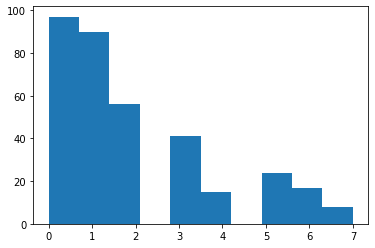

In [175]:
import matplotlib.pyplot as plt
    
plt.hist(total_number_visits_not_passed)
plt.show()

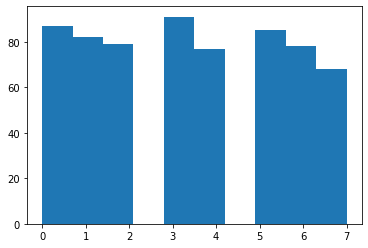

In [176]:

plt.hist(total_number_visits_passed)
plt.show()

## Number of lessons

In [177]:
total_number_lessons_passed = []
total_number_lessons_not_passed = []

for key, num in total_lessons.items():
    if key in pass_project:
        total_number_lessons_passed.append(num)
    else:
        total_number_lessons_not_passed.append(num)

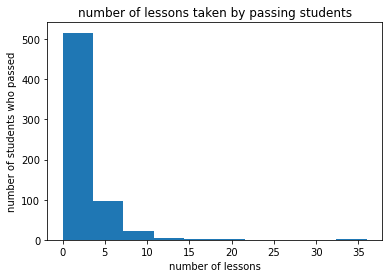

In [183]:
plt.hist(total_number_lessons_passed)
plt.xlabel("number of lessons")
plt.ylabel("number of students who passed")
plt.title("number of lessons taken by passing students")
plt.show()

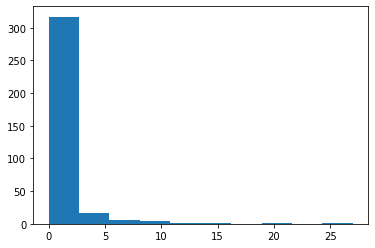

In [179]:
plt.hist(total_number_lessons_not_passed)
plt.show()

## Number of minutes

In [180]:
total_number_minutes_passed = []
total_number_minutes_not_passed = []

for key, num in total_minutes_by_account.items():
    if key in pass_project:
        total_number_minutes_passed.append(num)
    else:
        total_number_minutes_not_passed.append(num)

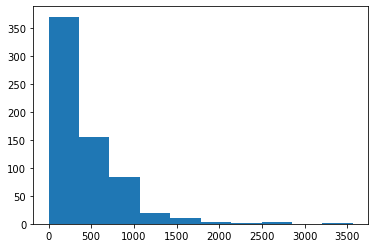

In [181]:
plt.hist(total_number_minutes_passed)
plt.show()

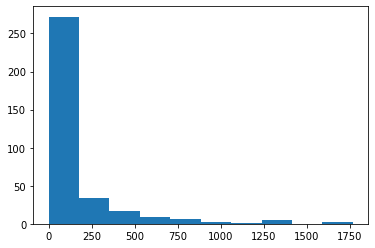

In [182]:
plt.hist(total_number_minutes_not_passed)
plt.show()